# Grove 온도 센서 예제

----
* [소개](#소개)
* [보드 설정](#보드-설정)
* [센서 설정](#센서-설정)
* [센서에서 읽기](#센서에서-읽기)
* [그래프 표시](#그래프-표시)

----
## 소개


PYNQ-Z1 및 PYNQ-Z2 보드에는 2 개의 Pmod 포트와 Arduino 인터페이스가 있습니다. PYNQ-Z2에는 또한 Raspberry Pi 인터페이스가 있습니다. 많은 Pmod, Grove 및 Peripherals가 PYNQ에서 지원됩니다.

Pmod는 Pmod 포트에 직접 연결할 수 있습니다. Grove Peripherals는 어댑터 보드를 통해 Pmod Port 또는 Arduino 헤더에 연결할 수 있습니다.

이 인터페이스의 외부 핀은 PL 핀에 연결됩니다. 이것은 오버레이에서 PL에 외부 주변 장치를 제어하는 로직을 구현해야한다는 것을 의미합니다. Pmods, Grove 및 Arduino 주변 장치는 PYNQ-Z1 및 PYNQ-Z2의 *base* 오버레이에서 IOP와 함께 사용할 수 있습니다.

이 노트북은 PYNQ-Z1 또는 PYNQ-Z2 보드에서 [Grove Temperature Sensor v1.2] (http://www.seeedstudio.com/wiki/Grove_-_Temperature_Sensor_V1.2)를 Grove ADC [Grove Temperature Sensor v1.2] (http://wiki.seeedstudio.com/Grove-I2C_ADC/)를 어떻게 사용할 수 있는지를 보입니다. Grove 온도 센서는 아날로그 신호를 생성하며 ADC가 필요합니다. 또한 _matplotlib_, 2D 플롯을위한 Python 패키지를 사용하여 그래프를 그리는 방법을 볼 수 있습니다.

이 노트북 예제에는 Grove 온도 센서, Grove ADC 및 Pynq Grove 어댑터가 필요합니다 (Pynq Grove 어댑터 대신 Pynq Arduino 어댑터를 사용할 수도 있음).

IOP에서 실행되는 온도 센서 용 드라이버는 단일 온도 값을 읽거나 정기적으로 여러 값을 읽고 로깅하는 것을 지원합니다.

----
## 보드 설정

base 오버레이를 로드하여 시작하십시오.

In [1]:
from pynq.overlays.base import BaseOverlay
base = BaseOverlay("base.bit")

## 센서 설정
1. ***pmod2grove***을 ***PMODB***에 연결하십시오.
2. ***Grove ADC*** 포트 ***J1*** (SCL, SDA, VCC, GND)을 Pynq Grove 어댑터의 ***G4*** 포트에 연결하십시오.
3. ***Grove TMP***을 ***Grove ADC*** (GND, VCC, NC, SIG)의 포트 ***J2***에 연결하십시오.


### 센서 인스턴스 만들기
센서는 ADC에 연결됩니다. 온도 센서의 인스턴스를 생성합니다.

Grove ADC는 Pynq Grove 어댑터를 통해 보드에 연결됩니다. 이것은 Pmod 포트 중 하나에 연결될 수 있습니다. 그 로브 ADC는 I2C 주변 장치입니다. I2C는 FPGA에 풀업 핀이 필요합니다. 기본 오버레이에서 이 핀은 Pynq Grove 어댑터의 포트 G3 또는 G4에서만 사용할 수 있으므로 ADC는 이러한 포트 중 하나에 연결되어야합니다. Pmod 포트 (PMODA 또는 PMODB) 및 어댑터의 핀은 인스턴스 작성 시 지정됩니다.

In [2]:
import math
from pynq.lib.pmod import Grove_TMP
from pynq.lib.pmod import PMOD_GROVE_G4 # import constants

# Grove2pmod is connected to PMODB (2)
# Grove ADC is connected to G4 (pins [6,2])
tmp = Grove_TMP(base.PMODB, PMOD_GROVE_G4)

## 센서에서 읽기
내부적으로 Grove ADC는 센서의 저항값을 제공합니다. IOP에서 이 값은 온도 값으로 변환됩니다.

In [4]:
temperature = tmp.read()
print(float("{0:.2f}".format(temperature)),'degree Celsius')

31.32 degree Celsius


셀을 여러 번 실행할 수 있습니다.

### 온도 값을 10초 동안 100ms마다 한 번씩 기록하기
다음 셀을 실행하면 100ms마다 온도 센서 값이 기록되고 10초 동안 실행됩니다. 온도 센서를 길게 터치하여 온도를 변경할 수 있습니다.

아래 셀의 값을 변경하여 로깅 간격과 지속 시간을 변경할 수 있습니다. 샘플은 내부 메모리에 저장되고 온도 값으로 변환됩니다.

In [5]:
import time
ms_delay = 100
delay_s = 10
tmp.set_log_interval_ms(ms_delay)
tmp.start_log()
time.sleep(delay_s) # Change input during this time
tmp_log = tmp.get_log()

----
## 그래프 표시

온도 센서 데이터 그래프를 표시하려면 matplotlib을 사용하십시오.

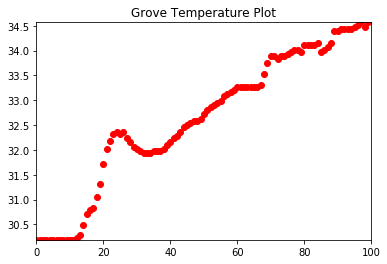

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(tmp_log)), tmp_log, 'ro')
plt.title('Grove Temperature Plot')
min_tmp_log = min(tmp_log)
max_tmp_log = max(tmp_log)
plt.axis([0, len(tmp_log), min_tmp_log, max_tmp_log])
plt.show()